In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [3]:
df = pd.read_csv('mousedrinkingdatafixed.csv')
y = df[['Label']]
X = df.drop(columns=['Label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.66)

## Some Quick Thoughts:
### Can we use a probiblistic approach for this problem? "What is the probability that a mouse reverts from its behavior after X days. If we get very strong probibility that based in law of large numbers, a mouse will not change its behavior after X days, what is the purpose of using time series? 
### Can we use SVM where we limit mouse data at X days and see what our accuracy is? Our accuracy at 52 days should be 100% since we classified this data by hand. 


In [60]:
clf = SVC(kernel='linear', C=1).fit(X_train, y_train.values.ravel())
clf.score(X_test, y_test)


0.98989898989899

## Procedure

We test every algorithm iteratively, feeding it a new piece of information every time- each day, we add an extra day's worth of data. 

For the first iteration (X=1), we give it data for day 1. Next (X=2), we give it data for the first 2 days. Next, we give it the first 3 days of data, and so on until day 52. 

## Algorithms

This list can be added to:
- Support Vector Machine (SVM)
- K-Nearest Neighbor (k-NN)
- Random Forest
- Multilayer Perceptron (MLP)

In [4]:
X_vals = list(range(1,53))
Y_vals = [[],[],[],[]]
for i in range(1,53):
    X_adjusted = X.iloc[:,0:i]
    Y_adjusted = y.iloc[:,0:i]
    X_train, X_test, y_train, y_test = train_test_split(X_adjusted, Y_adjusted, random_state=1, test_size=.66)
    clf = SVC(kernel='linear', C=1).fit(X_train, y_train.values.ravel())
    Y_vals[0].append(clf.score(X_test, y_test))
    clf = RandomForestClassifier().fit(X_train, y_train.values.ravel())
    Y_vals[1].append(clf.score(X_test, y_test))
    clf = KNeighborsClassifier(3).fit(X_train, y_train.values.ravel())
    Y_vals[2].append(clf.score(X_test, y_test))
    clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train.values.ravel())
    Y_vals[3].append(clf.score(X_test, y_test))


C:\Users\Uthma\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Uthma\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Uthma\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Uthma\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


** Algorithms are running fine but the MLP Algorithm has not converged ** 

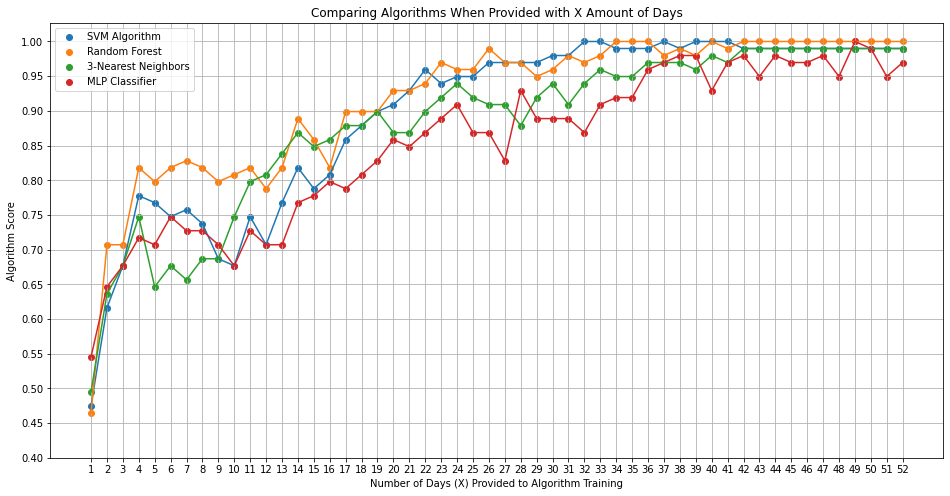

In [14]:
fig = plt.figure(figsize=(16, 8))
salplot = plt.subplot(1,1,1)
plt.plot(X_vals, Y_vals[0])
plt.plot(X_vals, Y_vals[1])
plt.plot(X_vals, Y_vals[2])
plt.plot(X_vals, Y_vals[3])



plt.scatter(X_vals, Y_vals[0], label="SVM Algorithm")
plt.scatter(X_vals, Y_vals[1], label="Random Forest")
plt.scatter(X_vals, Y_vals[2], label="3-Nearest Neighbors")
plt.scatter(X_vals, Y_vals[3], label="MLP Classifier")
plt.title('Comparing Algorithms When Provided with X Amount of Days')
plt.ylabel('Algorithm Score')
plt.xlabel('Number of Days (X) Provided to Algorithm Training')
plt.xticks(range(1,53))
plt.yticks(np.arange(.40, 1.05, 0.05))


plt.grid()
plt.legend()

## Results:
Note a sharp increase of algorithm accuracy for *every* algorithm at day 4

Algorithms perform competitively, with Random Forest converging at 100% accuracy fastest

After day 16, almost all algorithms start inputting >90% accuracy

MLP clearly improperly tuned.